In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/learn-ai-bbc/BBC News Train.csv
/kaggle/input/learn-ai-bbc/BBC News Sample Solution.csv
/kaggle/input/learn-ai-bbc/BBC News Test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/learn-ai-bbc/BBC News Train.csv")
test_df = pd.read_csv("/kaggle/input/learn-ai-bbc/BBC News Test.csv")

# **EDA**

In [3]:
train_df.shape

(1490, 3)

In [4]:
train_df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [7]:
print(test_df.shape)
test_df.head()

(735, 2)


,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


**Obseravtions from EDA:**

* We have 1490 rows in train data nd 735 in test data
* Train data is labeled i.e. it has Category column that will used for training
* Test data is not labeled, so we'll have to submit to Kaggle

**Continue EDA**

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


*No missing data to handle*

In [9]:
print(len(train_df['ArticleId'].unique()))


1490


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  735 non-null    int64 
 1   Text       735 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.6+ KB


**Visualizations**

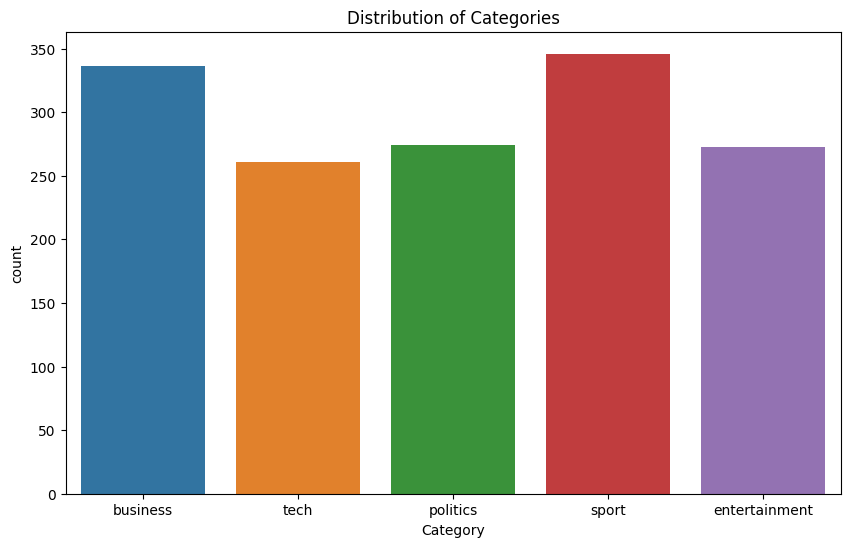

In [11]:
# Visualize the distribution of categories
plt.figure(figsize=(10,6))
sns.countplot(data=train_df, x='Category')
plt.title('Distribution of Categories')
plt.show()

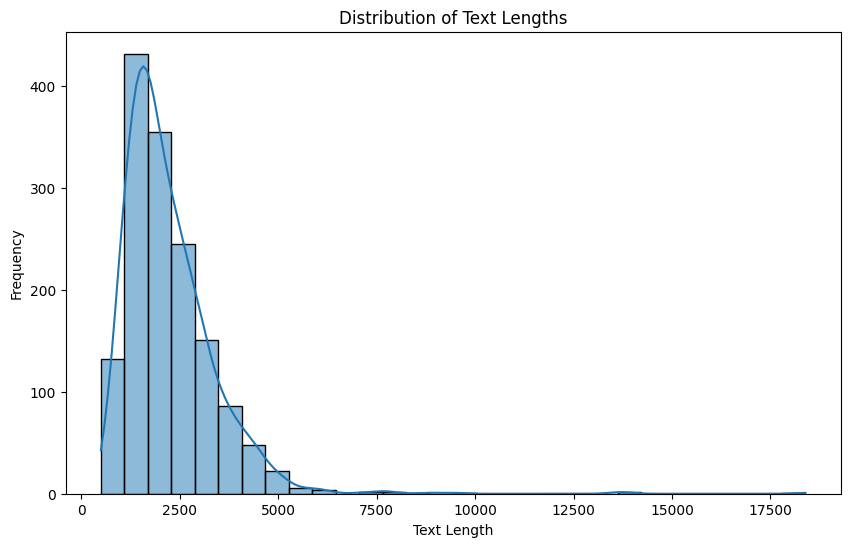

In [12]:
# Calculate the length of each article
train_df['text_length'] = train_df['Text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

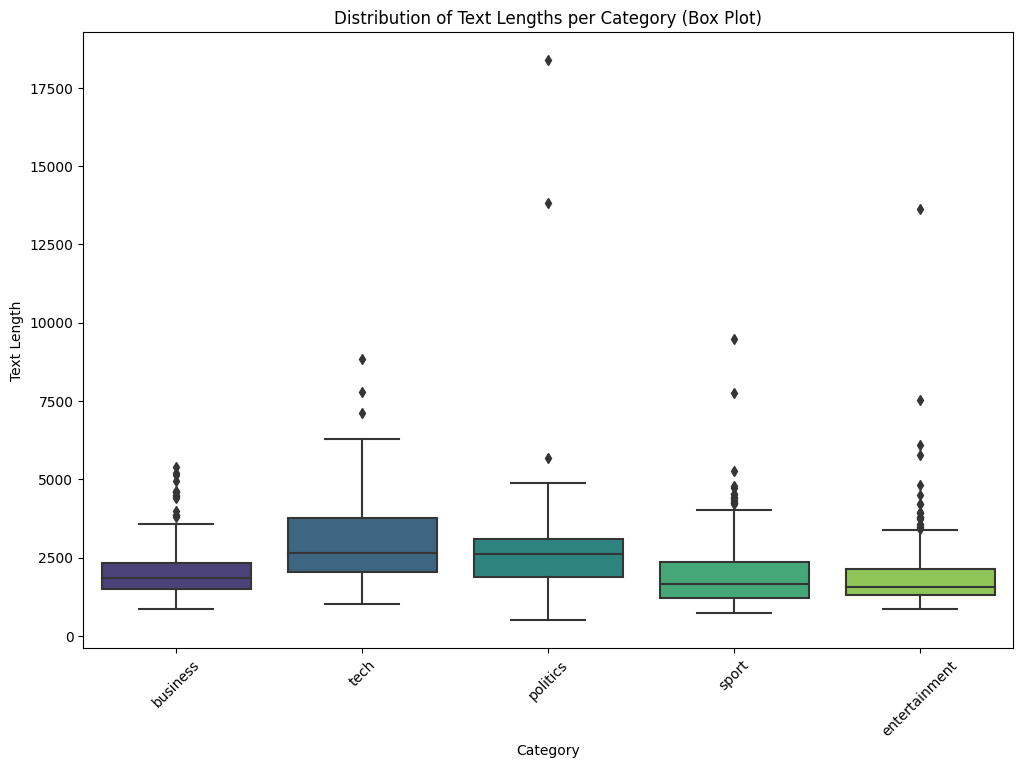

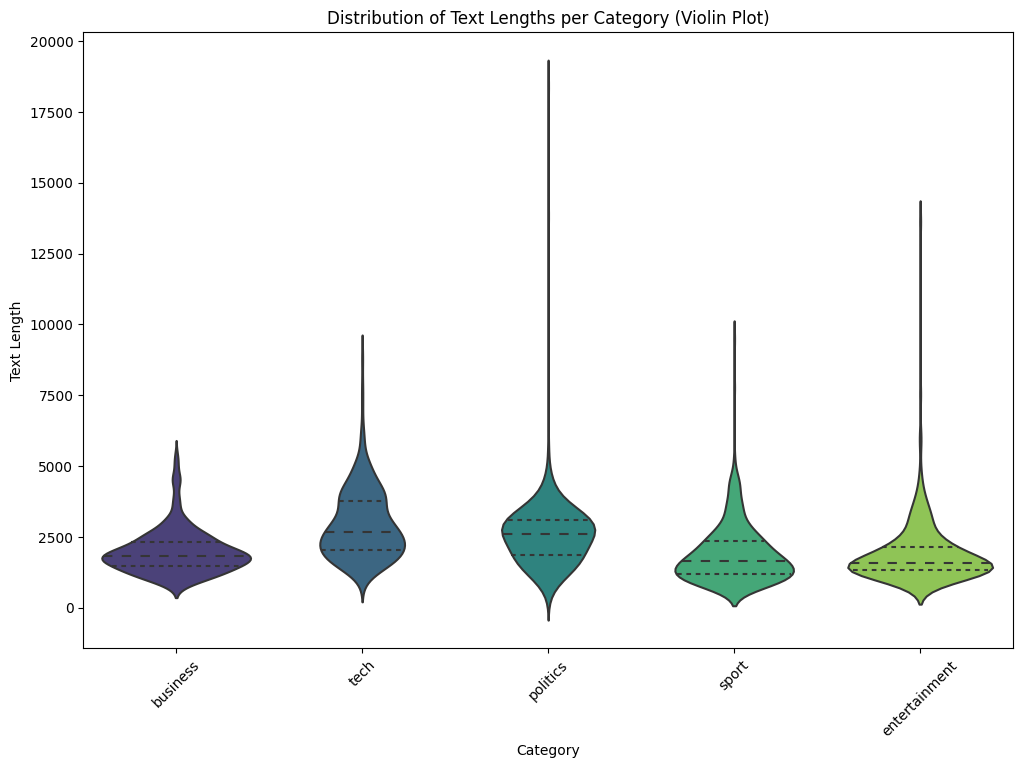


Average text length per category:
Category
tech             2939.291188
politics         2617.905109
business         1983.104167
entertainment    1910.380952
sport            1894.624277
Name: text_length, dtype: float64


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Boxplot shows median, quartiles, and outliers per category
sns.boxplot(data=train_df, x='Category', y='text_length', palette='viridis') 
plt.title('Distribution of Text Lengths per Category (Box Plot)')
plt.xlabel('Category')
plt.ylabel('Text Length')
plt.xticks(rotation=45) 
plt.show()

plt.figure(figsize=(12, 8))

# Violin plot shows the distribution shape (like a density plot) per category
sns.violinplot(data=train_df, x='Category', y='text_length', palette='viridis', inner='quartile') 
plt.title('Distribution of Text Lengths per Category (Violin Plot)')
plt.xlabel('Category')
plt.ylabel('Text Length')
plt.xticks(rotation=45)
plt.show()

print("\nAverage text length per category:")
print(train_df.groupby('Category')['text_length'].mean().sort_values(ascending=False))

# Preprocess

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import re

In [14]:
fix_punctuation = str.maketrans('', '', string.punctuation)

In [15]:
def preprocessText(train_text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(train_text)
    words = [word for word in words if not word in stop_words]
    stemmer= PorterStemmer()
    stem_text=' '.join([stemmer.stem(word.translate(fix_punctuation)) for word in words])
    return stem_text

In [16]:
preprocessText(train_df.iloc[0].Text)

'worldcom exboss launch defenc lawyer defend former worldcom chief berni ebber batteri fraud charg call compani whistleblow first wit  cynthia cooper worldcom exhead intern account alert director irregular account practic us telecom giant 2002 warn led collaps firm follow discoveri  11bn  £57bn  account fraud  mr ebber plead guilti charg fraud conspiraci  prosecut lawyer argu mr ebber orchestr seri account trick worldcom order employe hide expens inflat revenu meet wall street earn estim  ms cooper run consult busi told juri new york wednesday extern auditor arthur andersen approv worldcom account earli 2001 2002 said andersen given green light procedur practic use worldcom  mr ebber lawyer said unawar fraud argu auditor alert problem  ms cooper also said sharehold meet mr ebber often pass technic question compani financ chief give brief answer  prosecut star wit former worldcom financi chief scott sullivan said mr ebber order account adjust firm tell hit book  howev ms cooper said mr 

**Create Cleaned_Text**

In [17]:
train_df['Cleaned_Text'] = train_df['Text'].apply(preprocessText)

# Analyze and Process

**Get common Words**

In [18]:
from collections import Counter
import itertools

# Tokenize the text
train_df['tokens'] = train_df['Cleaned_Text'].apply(lambda x: x.split())

# Flatten the list of tokens and count the frequency of each word
all_words = list(itertools.chain(*train_df['tokens']))
word_freq = Counter(all_words)

# Display the most common words
print(word_freq.most_common(20))

[('said', 4838), ('mr', 2006), ('year', 1853), ('would', 1711), ('also', 1426), ('new', 1334), ('peopl', 1324), ('us', 1234), ('one', 1190), ('say', 1050), ('game', 1043), ('use', 1039), ('could', 1032), ('time', 965), ('last', 898), ('first', 893), ('make', 889), ('film', 818), ('two', 816), ('govern', 812)]


**Word frequencies by Category**

In [19]:
categories = train_df['Category'].unique()

for category in categories:
    category_words = list(itertools.chain(*train_df[train_df['Category'] == category]['tokens']))
    category_word_freq = Counter(category_words)
    print(f"Most common words in {category}:")
    print(category_word_freq.most_common(10))
    print("\n")

Most common words in business:
[('said', 1100), ('year', 574), ('us', 512), ('mr', 394), ('compani', 392), ('firm', 374), ('market', 352), ('would', 308), ('bank', 281), ('also', 279)]


Most common words in tech:
[('said', 1064), ('use', 662), ('peopl', 646), ('game', 470), ('mobil', 421), ('phone', 395), ('technolog', 389), ('servic', 369), ('mr', 350), ('new', 349)]


Most common words in politics:
[('said', 1445), ('mr', 1100), ('would', 710), ('labour', 488), ('govern', 479), ('elect', 477), ('parti', 450), ('say', 443), ('blair', 391), ('peopl', 372)]


Most common words in sport:
[('said', 635), ('game', 482), ('win', 419), ('play', 416), ('england', 327), ('first', 323), ('player', 308), ('year', 296), ('time', 270), ('world', 266)]


Most common words in entertainment:
[('film', 706), ('said', 594), ('best', 404), ('year', 392), ('award', 341), ('music', 336), ('star', 319), ('show', 283), ('also', 277), ('one', 267)]




**Word Cloud**

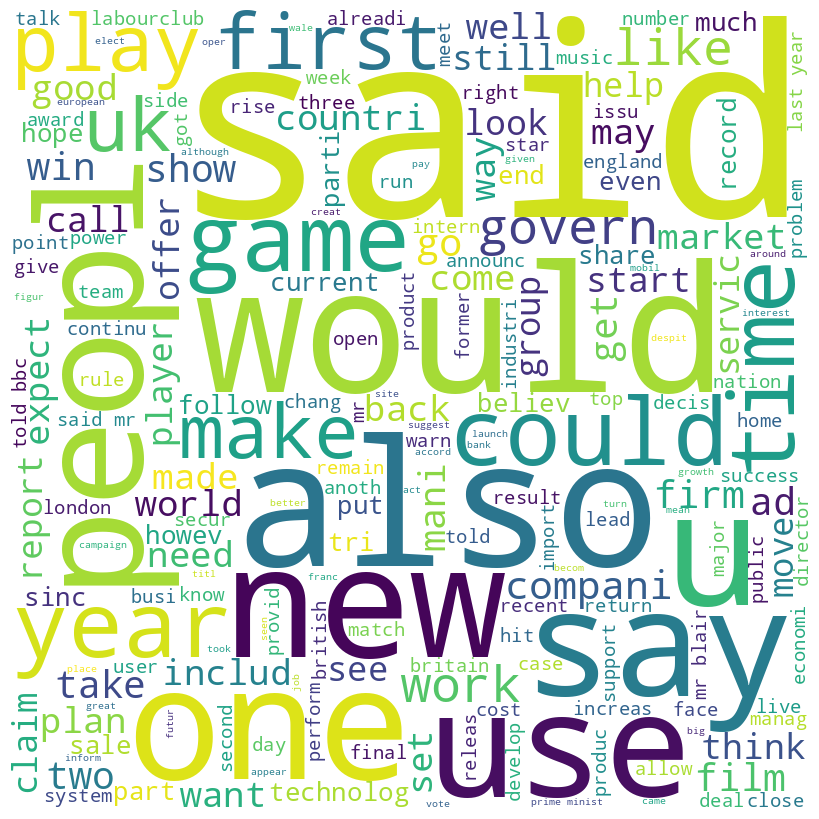

In [20]:
from wordcloud import WordCloud
stop_words = set(stopwords.words('english'))

# Generate a word cloud for all words
wordcloud = WordCloud(width=800, height=800,
                     background_color='white',
                     stopwords=stop_words,
                     min_font_size=10).generate(" ".join(all_words))

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

****

**Transform Text data into Matrix**

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create an instance of TfidfVectorizer
vect = TfidfVectorizer()

# First fit the vectorizer to the data and then transform the text into a sparse matrix of TF-IDF features
X = vect.fit_transform(train_df['Cleaned_Text'])
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 218394 stored elements and shape (1490, 19645)>

# Model Building

**Non-negative Matrix Factorization (NMF) from Scikit-Learn's decomposition module.**

In [22]:
from sklearn.decomposition import NMF

# We have five categories in our data as we confirmed in EDA step
model = NMF(n_components=5, random_state=42)

# The NMF model is fitted to the data X, 
# store the result of the transformation
W = model.fit_transform(X)

# let us get features/components
H = model.components_

In [23]:
print('W shape: ', W.shape)
print('H shape: ', H.shape)

W shape:  (1490, 5)
H shape:  (5, 19645)


**Post Processing**

In [24]:
# Assigning the predicted label to each document (highest association)
predicted_label = W.argmax(axis=1)

# Mapping each label to the most frequent category
label_to_category = train_df.groupby(predicted_label)['Category'].agg(lambda x: x.value_counts().idxmax()).to_dict()

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predicted_category = np.vectorize(label_to_category.get)(predicted_label)
print(predicted_category)

accuracy_score(train_df.Category, predicted_category)
confusion_matrix(train_df.Category, predicted_category)

['business' 'business' 'business' ... 'business' 'tech' 'tech']


array([[312,   1,  13,   0,  10],
       [ 10, 226,   6,   3,  28],
       [ 18,   0, 249,   3,   4],
       [  2,   4,   0, 340,   0],
       [  4,   6,   3,   5, 243]])

**Predict category for Test data**

In [26]:
test_pred_category = np.vectorize(label_to_category.get)(model.transform(vect.transform(test_df['Text'].apply(preprocessText))).argmax(axis=1))

In [27]:
test_df['Category'] = test_pred_category
test_df.head()

,ArticleId,Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,sport
3,459,india s reliance family feud heats up the ongo...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport


**Kaggle - Submission**

In [28]:
test_df.drop(['Text'], axis = 1).to_csv('submission_nmf_1.csv', index = False)

## Hyperparameter Tuning 

In [29]:
# let us try Multiplicative Update solver
model_kull = NMF(n_components=5, random_state=42, solver='mu', beta_loss='kullback-leibler')

W_kull = model_kull.fit_transform(X)
predicted_label_kull = np.squeeze(np.asarray(W_kull.argmax(axis=1)))
label_to_categ_kull = {}
for i in range(5):
    label_to_categ_kull[i] = train_df.iloc[np.where(predicted_label_kull == i)[0]]['Category'].value_counts().idxmax()
print(label_to_categ_kull)
test_pred_categ_kull = np.vectorize(label_to_categ_kull.get)(model_kull.transform(vect.transform(test_df['Text'].apply(preprocessText))).argmax(axis=1))
test_df['Category'] = test_pred_categ_kull
test_df.drop(['Text'], axis = 1).to_csv('submission_mu_kull_1.csv', index = False)

{0: 'sport', 1: 'politics', 2: 'tech', 3: 'entertainment', 4: 'business'}


In [30]:
# let us try Coordinate Descent solver
model_kull = NMF(n_components=5, random_state=42, solver='cd', beta_loss='frobenius')

W_kull = model_kull.fit_transform(X)
predicted_label_kull = np.squeeze(np.asarray(W_kull.argmax(axis=1)))
label_to_categ_kull = {}
for i in range(5):
    label_to_categ_kull[i] = train_df.iloc[np.where(predicted_label_kull == i)[0]]['Category'].value_counts().idxmax()
print(label_to_categ_kull)
test_pred_categ_kull = np.vectorize(label_to_categ_kull.get)(model_kull.transform(vect.transform(test_df['Text'].apply(preprocessText))).argmax(axis=1))
test_df['Category'] = test_pred_categ_kull
test_df.drop(['Text'], axis = 1).to_csv('submission_cd_frobenius_1.csv', index = False)

{0: 'sport', 1: 'politics', 2: 'tech', 3: 'entertainment', 4: 'business'}


## Supervised Models

**RandomForest**

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X, train_df.Category)

print(rfc.score(X, train_df.Category))

test_df['Category'] = rfc.predict(vect.transform(test_df['Text'].apply(preprocessText)))
test_df.drop(['Text'], axis = 1).to_csv('submission_rf_1.csv', index = False)

1.0


**SVM**

In [35]:
import pandas as pd
from sklearn.svm import LinearSVC

lsvc = LinearSVC(random_state=42, dual=False, C=1.0, max_iter=1000)

# train the model
lsvc.fit(X, train_df.Category)

X_test_transformed = vect.transform(test_df['Text'].apply(preprocessText))
test_df['Category'] = lsvc.predict(X_test_transformed)
test_df.drop(['Text'], axis = 1).to_csv('submission_svm_1.csv', index = False)



Training LinearSVC model...
